In [1]:
#Using Feedforward Neural Network to solve time series 
# Concept of NN in timeseries: using the prevoius days price data as input, and today price as output
#dense = fully connected layer/every neuron is connected to other neurons
#Sequential: our model will be in sequential. First layer comes in, then another layers, etc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving USD_JPY Historical Data.csv to USD_JPY Historical Data.csv
Saving USD_JPY Test.csv to USD_JPY Test.csv


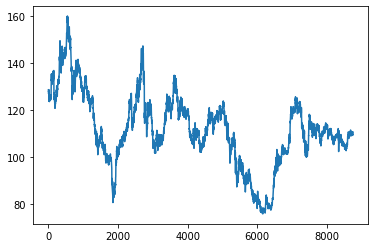

In [3]:
dataframe = pd.read_csv('USD_JPY Historical Data.csv', usecols=[1])
plt.plot(dataframe)

In [4]:
# convert pandas dataframe to numpy array (when dealing with NN, have to convert to np array)
dataset = dataframe.values
dataset = dataset.astype('float32') #convert values to float instead of integer 
dataset.dtype

dtype('float32')

In [5]:
#Normalization is optional but recommended for neural network as certain 
#activation functions are sensitive to magnitude of numbers. 
#normalization of the dataset 
scaler = MinMaxScaler(feature_range=(0,1)) 
#scale the value of dataset to be scalled to value between 0-1 instead because activation function in NN prefer value 0-1
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.62764686],
       [0.61789197],
       [0.61836785],
       [0.62217456],
       [0.6193195 ]], dtype=float32)

In [6]:
#Once dataset is ready, we gotta split dataset into training, testing, validation data
#we can not use random way of splitting dataset (as other NN image case when randomly choosing 60% of the value)
# into train and test as the sequence of events is important for time series 
# So take first 60% values for train and the reamining 1/3 for testing 
#split into train and test sets 
train_size = int(len(dataset) *0.66)
test_size = len(dataset)- train_size
train, test = dataset[0:train_size, :], dataset[train_size: len(dataset), :]
print(train_size, test_size) #the top 95 row is train size while the bottom 49 is test size 

5774 2975


In [7]:
#as NN will require some inputs and outputs (at the next layer), we have to divide the data as input and output 
# take 1st-5th as input, the 6th is output; next, take 2nd-6th as input, the 7th is output, etc
# this is just a function, when run nothing will show at first
def to_sequences(dataset, seq_size=1):
  x =[] #start with x, y empty
  y =[]

  for i in range(len(dataset)-seq_size-1):
    #print(i)
    window = dataset[i:(i+seq_size), 0]
    x.append(window)
    y.append(dataset[i+seq_size, 0])
  return np.array(x), np.array(y)

In [8]:
#call the above function
seq_size = 20 #number of time steps to look back 
#larger sequences (look futher back) may improve forecasting

In [9]:
#create training and testing, apply these to_sequencense funtion above with train/test set with seq_size of 5 
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [10]:
# value of input 
trainX[0:3]

array([[0.62764686, 0.61789197, 0.61836785, 0.62217456, 0.6193195 ,
        0.6118248 , 0.6071853 , 0.6128954 , 0.614561  , 0.62883645,
        0.6193195 , 0.607899  , 0.60849386, 0.6056388 , 0.5907685 ,
        0.58589095, 0.57018787, 0.58553416, 0.5841065 , 0.57649297],
       [0.61789197, 0.61836785, 0.62217456, 0.6193195 , 0.6118248 ,
        0.6071853 , 0.6128954 , 0.614561  , 0.62883645, 0.6193195 ,
        0.607899  , 0.60849386, 0.6056388 , 0.5907685 , 0.58589095,
        0.57018787, 0.58553416, 0.5841065 , 0.57649297, 0.57185334],
       [0.61836785, 0.62217456, 0.6193195 , 0.6118248 , 0.6071853 ,
        0.6128954 , 0.614561  , 0.62883645, 0.6193195 , 0.607899  ,
        0.60849386, 0.6056388 , 0.5907685 , 0.58589095, 0.57018787,
        0.58553416, 0.5841065 , 0.57649297, 0.57185334, 0.5744706 ]],
      dtype=float32)

In [11]:
#comparing the train set vs trainX set
# trainX 1st row = 1-5th value in train
# trainX 2nd row = 2-6th value in train
# trainX 3rd row = 3-7th value in train
train[0:7]

array([[0.62764686],
       [0.61789197],
       [0.61836785],
       [0.62217456],
       [0.6193195 ],
       [0.6118248 ],
       [0.6071853 ]], dtype=float32)

In [12]:
#value of output 
# 1st value of trainY = 6th value of train
# 2nd value of trainY = 7th value of train
trainY[0:3]

array([0.57185334, 0.5744706 , 0.5876754 ], dtype=float32)

In [13]:
print("Shape of training set:{}".format(trainX.shape))
print("Shape of test set:{}".format(testX.shape))

Shape of training set:(5753, 20)
Shape of test set:(2954, 20)


In [16]:
#building our NN model using sequential method in keras
#input dimension are ...(N x seq_size)

model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #input dimension = number of columns = 5 because we have 5 columns in trainX
#model.add(Dense(32, activation='relu')) #input Dense layers, if too many dense layer => overfitting 
model.add(Dense(1)) #last layer = output, only 1 neuron which is y value (6th value of train for input from 1-5th of train, etc)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
#First layer: 64 dimensions and 384 parameters Second layer: 1 dimension and 65 parameters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1344      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
#fitting the model with 100 epochs
# validation data based on testX and testY, the model will be checked and given accuracy (acc) report metrics (above)

model.fit(trainX, trainY, validation_data=(testX, testY), verbose= 2, batch_size =32, epochs = 100, shuffle= False)

Epoch 1/100
180/180 - 1s - loss: 0.0024 - val_loss: 0.0011 - 789ms/epoch - 4ms/step
Epoch 2/100
180/180 - 0s - loss: 9.0760e-04 - val_loss: 0.0018 - 339ms/epoch - 2ms/step
Epoch 3/100
180/180 - 0s - loss: 9.1525e-04 - val_loss: 0.0025 - 331ms/epoch - 2ms/step
Epoch 4/100
180/180 - 0s - loss: 9.0834e-04 - val_loss: 0.0028 - 331ms/epoch - 2ms/step
Epoch 5/100
180/180 - 0s - loss: 8.9018e-04 - val_loss: 0.0030 - 325ms/epoch - 2ms/step
Epoch 6/100
180/180 - 0s - loss: 8.6677e-04 - val_loss: 0.0030 - 334ms/epoch - 2ms/step
Epoch 7/100
180/180 - 0s - loss: 8.4877e-04 - val_loss: 0.0029 - 382ms/epoch - 2ms/step
Epoch 8/100
180/180 - 0s - loss: 8.1853e-04 - val_loss: 0.0029 - 333ms/epoch - 2ms/step
Epoch 9/100
180/180 - 0s - loss: 8.1845e-04 - val_loss: 0.0027 - 365ms/epoch - 2ms/step
Epoch 10/100
180/180 - 0s - loss: 7.7755e-04 - val_loss: 0.0025 - 340ms/epoch - 2ms/step
Epoch 11/100
180/180 - 0s - loss: 7.3293e-04 - val_loss: 0.0023 - 311ms/epoch - 2ms/step
Epoch 12/100
180/180 - 0s - loss: 

In [18]:
# see how output looks like 
# predict the output. after setting up and fitting the model, we will ask model to make prediction 
# model.predict (value what you want to predict)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict[0:3]

array([[0.5149931],
       [0.508523 ],
       [0.5057617]], dtype=float32)

In [19]:
#comparing prediction with orignal trainY data
trainY[0:3]

array([0.57185334, 0.5744706 , 0.5876754 ], dtype=float32)

In [20]:
#rescale train/test prediction back to original data type. Using scaler.inverse_transform
trainPredict= scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [21]:
trainY_inverse[0:7]

array([[123.88999615, 124.11000135, 125.219998  , ...,  93.95999911,
         93.86000221,  94.66000747]])

In [22]:
trainPredict[5000]

array([116.50273], dtype=float32)

In [78]:
#calculate the root mean squared error between the training and prediction on training 
# and between testing and test prediction 
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:, 0]))
print ('Train Score: %.2f RMSE'% (trainScore))

Train Score: 0.86 RMSE


In [79]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:, 0]))
print ('Test Score: %.2f RMSE'% (testScore))

Test Score: 0.60 RMSE


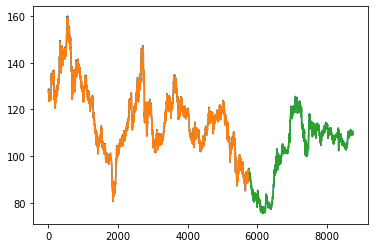

In [77]:
#shift train prediction for plotting
#must shift the predictions so that they align on the x-axis with the original
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

#shift test predictions for plotting 
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :]= testPredict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
#Load the Test Data
dataframe2 = pd.read_csv('USD_JPY Test.csv', usecols=[4])
actual_prices = dataframe2.values
total_dataset = pd.concat((dataframe['Price'], dataframe2['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset)-len(dataframe2) - seq_size:].values
model_inputs= model_inputs.reshape (-1,1)
model_inputs = scaler.transform(model_inputs)

In [24]:
# Make Predictions on Test Data
x_test = []

for x in range(seq_size, len(model_inputs)):
  x_test.append(model_inputs[x-seq_size:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

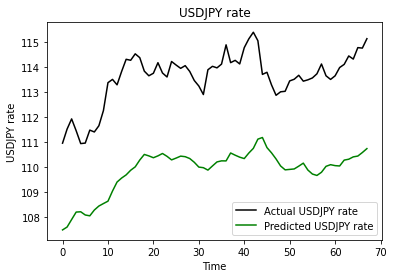

In [25]:
# Plot the test prediction 

plt.plot(actual_prices, color='black', label =f'Actual USDJPY rate')
plt.plot(predicted_prices, color='green', label=f"Predicted USDJPY rate")
plt.title(f"USDJPY rate")
plt.xlabel('Time')
plt.ylabel(f'USDJPY rate')
plt.legend()
plt.show()

In [28]:
#Predict Next Day 

real_data = [model_inputs[len(model_inputs) - seq_size:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')

Prediction: [[110.951775]]
